In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv("Electricity Consumption.csv")

In [42]:
df.shape

(561, 2)

In [43]:
df.head(5)

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [44]:
df.tail()

,DATE,Electricty_Consumption_in_TW
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765
560,9/1/2019,109.7190


In [45]:
df.isna().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [47]:
df["DATE"]=pd.to_datetime(df["DATE"])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [49]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107


In [50]:
df.tail()

,DATE,Electricty_Consumption_in_TW
556,2019-05-01,97.5860
557,2019-06-01,110.8580
558,2019-07-01,122.1014
559,2019-08-01,121.7765
560,2019-09-01,109.7190


In [51]:
dt_df=pd.date_range(start='1973-01-01',end='2019-10-01',freq='ME')
dt_df = pd.DataFrame(dt_df,columns=['date'])

In [52]:
dt_df.head()

,date
0,1973-01-31
1,1973-02-28
2,1973-03-31
3,1973-04-30
4,1973-05-31


In [53]:
dt_df.tail()

,date
556,2019-05-31
557,2019-06-30
558,2019-07-31
559,2019-08-31
560,2019-09-30


In [54]:
def get_date(x):
    d = str(x).split('-')[:-1]
    d.append('01')
    final_dt = '-'.join(d)
    return final_dt

In [55]:
dt_df['date'] = dt_df['date'].apply(lambda x: get_date(x))

In [56]:
dt_df.tail(3)

,date
558,2019-07-01
559,2019-08-01
560,2019-09-01


In [57]:
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    561 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [58]:
dt_df["date"]=pd.to_datetime(dt_df["date"])

In [59]:
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.5 KB


In [60]:
dt_df.shape,df.shape

((561, 1), (561, 2))

In [61]:
merged_df = dt_df.merge(df,left_on=['date'],right_on=['DATE'],how='left')

In [62]:
merged_df.head()

,date,DATE,Electricty_Consumption_in_TW
0,1973-01-01,1973-01-01,35.9728
1,1973-02-01,1973-02-01,36.1334
2,1973-03-01,1973-03-01,35.0625
3,1973-04-01,1973-04-01,33.8416
4,1973-05-01,1973-05-01,33.5107


In [63]:
merged_df.tail()

,date,DATE,Electricty_Consumption_in_TW
556,2019-05-01,2019-05-01,97.5860
557,2019-06-01,2019-06-01,110.8580
558,2019-07-01,2019-07-01,122.1014
559,2019-08-01,2019-08-01,121.7765
560,2019-09-01,2019-09-01,109.7190


In [64]:
merged_df.shape

(561, 3)

In [65]:
merged_df.isna().sum()

date                            0
DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [66]:
561*80/100


448.8

In [67]:
final_df = merged_df[['date','Electricty_Consumption_in_TW']]
train = final_df.iloc[:449]
test = final_df.iloc[449:]

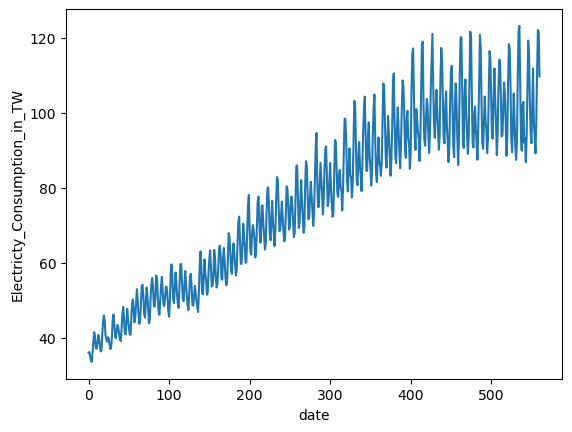

In [68]:

plt.xlabel("date")
plt.ylabel("Electricty_Consumption_in_TW")
plt.plot(final_df['Electricty_Consumption_in_TW'])

In [69]:
final_df['year'] = final_df['date'].dt.year

In [70]:
final_df[final_df['year']==1973]

,date,Electricty_Consumption_in_TW,year
0,1973-01-01,35.9728,1973
1,1973-02-01,36.1334,1973
2,1973-03-01,35.0625,1973
3,1973-04-01,33.8416,1973
4,1973-05-01,33.5107,1973
5,1973-06-01,36.4823,1973
6,1973-07-01,39.1412,1973
7,1973-08-01,41.4137,1973
8,1973-09-01,40.1639,1973
9,1973-10-01,37.1133,1973


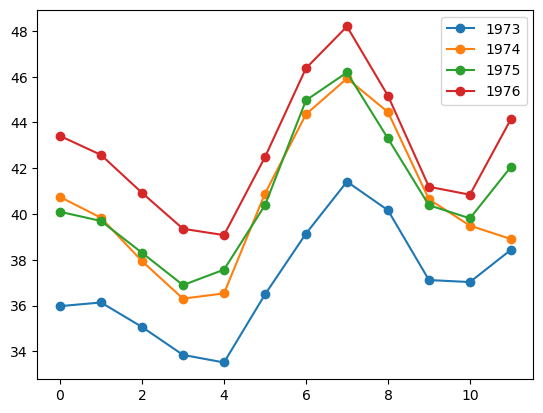

In [71]:
plt.plot(final_df[final_df['year']==1973]['Electricty_Consumption_in_TW'].values,label='1973',marker='o')
plt.plot(final_df[final_df['year']==1974]['Electricty_Consumption_in_TW'].values,label='1974',marker='o')
plt.plot(final_df[final_df['year']==1975]['Electricty_Consumption_in_TW'].values,label='1975',marker='o')
plt.plot(final_df[final_df['year']==1976]['Electricty_Consumption_in_TW'].values,label='1976',marker='o')
plt.legend()
plt.show()

# Implementing Augmented Dicky Fuller Test

In [73]:
from statsmodels.tsa.stattools import adfuller

In [74]:
datapoints = adfuller(final_df['Electricty_Consumption_in_TW'])

In [75]:
datapoints

(-1.7405933729832554,
 0.41032816044686227,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [76]:
labels = ['test_parameters','p-value','lags-used','dataobs']

In [77]:
d = dict(zip(labels,datapoints[:4]))
d

{'test_parameters': -1.7405933729832554,
 'p-value': 0.41032816044686227,
 'lags-used': 15,
 'dataobs': 545}

In [78]:
if(d['p-value']>0.05):
    print("Accept the Null Hypothesis")
    print("The time series is non-stationary in nature")
else:
    print("Reject the null hypothesis")
    print("The time series is stationary in nature")

Accept the Null Hypothesis
The time series is non-stationary in nature


In [79]:
final_df.head()

,date,Electricty_Consumption_in_TW,year
0,1973-01-01,35.9728,1973
1,1973-02-01,36.1334,1973
2,1973-03-01,35.0625,1973
3,1973-04-01,33.8416,1973
4,1973-05-01,33.5107,1973


In [80]:
final_df['lag3'] =  final_df['Electricty_Consumption_in_TW'].shift(3)
final_df.head()

,date,Electricty_Consumption_in_TW,year,lag3
0,1973-01-01,35.9728,1973,NaN
1,1973-02-01,36.1334,1973,NaN
2,1973-03-01,35.0625,1973,NaN
3,1973-04-01,33.8416,1973,35.9728
4,1973-05-01,33.5107,1973,36.1334


In [81]:
final_df['diff_3'] = final_df['Electricty_Consumption_in_TW'] - final_df['Electricty_Consumption_in_TW'].shift(3)
final_df.head()

,date,Electricty_Consumption_in_TW,year,lag3,diff_3
0,1973-01-01,35.9728,1973,NaN,NaN
1,1973-02-01,36.1334,1973,NaN,NaN
2,1973-03-01,35.0625,1973,NaN,NaN
3,1973-04-01,33.8416,1973,35.9728,-2.1312
4,1973-05-01,33.5107,1973,36.1334,-2.6227


In [82]:
datapoints = adfuller(final_df['diff_3'].dropna())
labels = ['test_parameters','p-value','lags-used','dataobs']
d = dict(zip(labels,datapoints[:4]))
d

{'test_parameters': -7.014995865992366,
 'p-value': 6.76859694942276e-10,
 'lags-used': 19,
 'dataobs': 538}

In [83]:
if(d['p-value']>0.05):
    print("Accept the Null Hypothesis")
    print("The time series is non-stationary in nature")
else:
    print("Reject the null hypothesis")
    print("The time series is stationary in nature")

Reject the null hypothesis
The time series is stationary in nature


# Decomposition

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [86]:
decomposition=seasonal_decompose(final_df["Electricty_Consumption_in_TW"].dropna(),period=12)

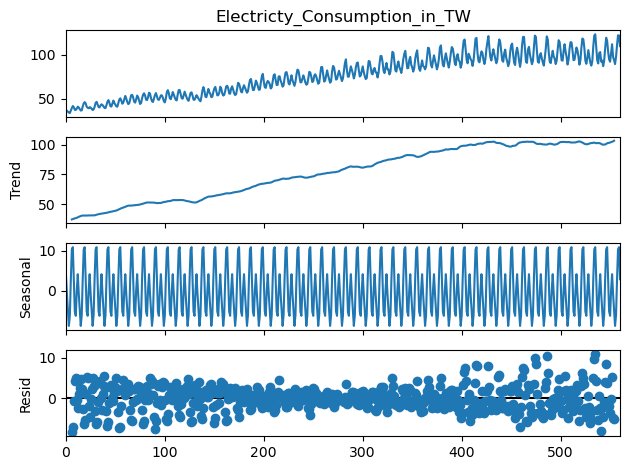

In [87]:
decomposition.plot()
plt.show()

# ARIMA MODEL

In [89]:
from statsmodels.tsa.arima.model import ARIMA

In [90]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sn

In [92]:
final_df.head()

,date,Electricty_Consumption_in_TW,year,lag3,diff_3
0,1973-01-01,35.9728,1973,NaN,NaN
1,1973-02-01,36.1334,1973,NaN,NaN
2,1973-03-01,35.0625,1973,NaN,NaN
3,1973-04-01,33.8416,1973,35.9728,-2.1312
4,1973-05-01,33.5107,1973,36.1334,-2.6227


In [93]:
#final_df=final_df[["date","Electricty_Consumption_in_TW",'year']]

In [94]:
final_df.head()

,date,Electricty_Consumption_in_TW,year,lag3,diff_3
0,1973-01-01,35.9728,1973,NaN,NaN
1,1973-02-01,36.1334,1973,NaN,NaN
2,1973-03-01,35.0625,1973,NaN,NaN
3,1973-04-01,33.8416,1973,35.9728,-2.1312
4,1973-05-01,33.5107,1973,36.1334,-2.6227


In [95]:
final_df.shape

(561, 5)

In [96]:
561*.80

448.8

In [97]:
train_s = final_df.iloc[:449]
test_s = final_df.iloc[449:]
train_s.shape, test_s.shape

((449, 5), (112, 5))

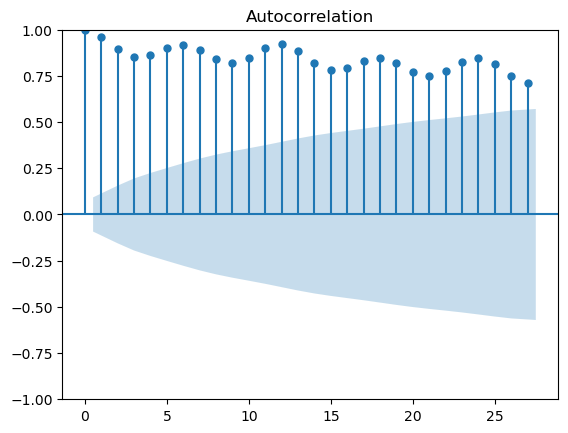

In [98]:
# ACF Plot 
fig = sn.graphics.tsa.plot_acf(train_s['Electricty_Consumption_in_TW'])

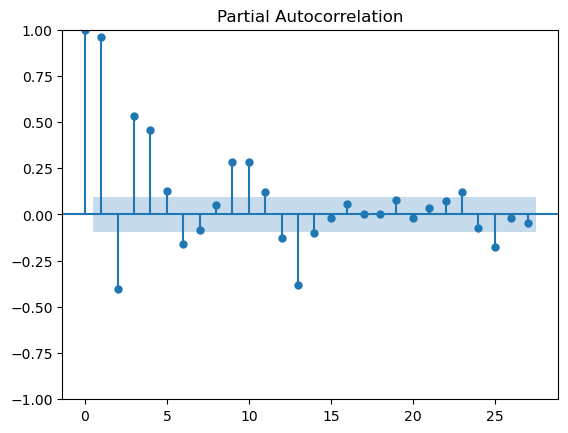

In [99]:
fig = sn.graphics.tsa.plot_pacf(train_s['Electricty_Consumption_in_TW'])

In [100]:
arima = ARIMA(train_s['Electricty_Consumption_in_TW'],order=(3,1,2))

In [101]:
model = arima.fit()

In [102]:
xx = model.predict(start=450 , end= 561 ,dynamic=True)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [103]:
xx

450    109.844865
451    107.554522
452     96.904502
453     88.572840
454     90.905246
          ...    
557    102.837598
558    109.793955
559    106.142049
560     95.548606
561     88.632130
Name: predicted_mean, Length: 112, dtype: float64

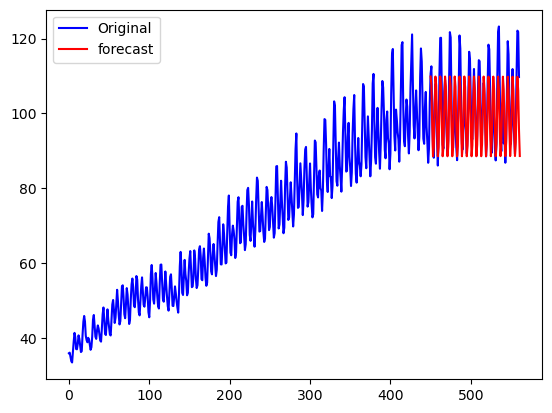

In [104]:
#plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals')
org=plt.plot(final_df["Electricty_Consumption_in_TW"],color="blue",label="Original")
plt.plot(xx,label='forecast',color="red")
plt.legend()
plt.show()

In [105]:
mean_absolute_percentage_error(test_s['Electricty_Consumption_in_TW'],xx)

0.07911405346427257

In [106]:
MSE_ARIMA=mean_squared_error(test_s['Electricty_Consumption_in_TW'],xx)

In [107]:
RMSE_ARIMA=np.sqrt(MSE_ARIMA)
RMSE_ARIMA

10.538776039421174

In [108]:
rmspe_ARIMA = (np.sqrt(np.mean(np.square((test_s['Electricty_Consumption_in_TW'] - pd.Series(xx)) / test_s['Electricty_Consumption_in_TW'])))) * 100
rmspe_ARIMA

6.014587073200509

# SARIMA

In [110]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [111]:
sarima=SARIMAX(train_s['Electricty_Consumption_in_TW'],order=(3,1,2))

In [112]:
S_model=sarima.fit()

In [113]:
xxx = S_model.predict(start=450 , end= 561 ,dynamic=True)
xxx

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


450    109.844865
451    107.554522
452     96.904502
453     88.572840
454     90.905246
          ...    
557    102.837598
558    109.793955
559    106.142049
560     95.548606
561     88.632130
Name: predicted_mean, Length: 112, dtype: float64

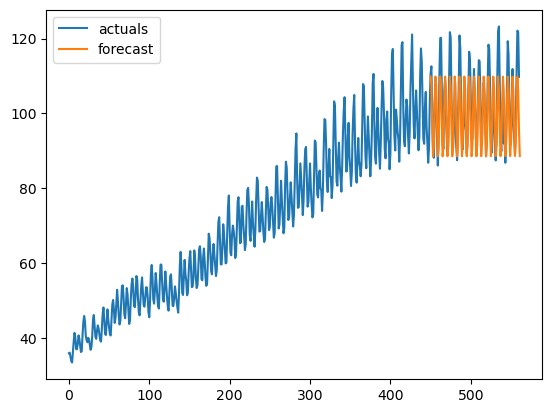

In [114]:
plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(xxx,label='forecast')
plt.legend()
plt.show()

In [115]:
mean_absolute_percentage_error(test_s['Electricty_Consumption_in_TW'],xxx)

0.07911405346427257

In [116]:
MSE_SARIMA=mean_squared_error(test_s['Electricty_Consumption_in_TW'],xxx)

In [117]:
RMSE_SARIMA=np.sqrt(MSE_ARIMA)
RMSE_SARIMA

10.538776039421174

In [118]:
rmspe_SARIMA = (np.sqrt(np.mean(np.square((test_s['Electricty_Consumption_in_TW'] - pd.Series(xxx)) / test_s['Electricty_Consumption_in_TW'])))) * 100
rmspe_SARIMA

6.014587073200509

# Exponential Smoothing

In [120]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [121]:
ets=ExponentialSmoothing((train_s['Electricty_Consumption_in_TW']),seasonal='mul', seasonal_periods=12)

In [122]:
ets_model=ets.fit()

In [123]:
xxxx = ets_model.predict(start=450 , end= 561 )
xxxx

450    112.738308
451    113.320473
452    101.417315
453     91.143590
454     88.813869
          ...    
557    104.521328
558    112.738308
559    113.320473
560    101.417315
561     91.143590
Length: 112, dtype: float64

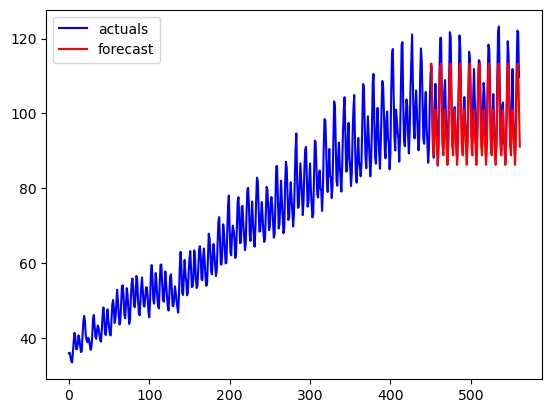

In [124]:
plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals',color='blue')
plt.plot(xxxx,label='forecast',color="red")
plt.legend()
plt.show()

In [125]:
mean_absolute_percentage_error(test_s["Electricty_Consumption_in_TW"],xxxx)

0.0775099149249916

In [126]:
MSE_ets=mean_squared_error(test_s['Electricty_Consumption_in_TW'],xxxx)

In [127]:
RMSE_ets=np.sqrt(MSE_ets)
RMSE_ets

9.410894177250325

In [128]:
rmspe_ets = (np.sqrt(np.mean(np.square((test_s['Electricty_Consumption_in_TW'] - pd.Series(xxxx)) / test_s['Electricty_Consumption_in_TW'])))) * 100
rmspe_ets

4.293788655378329

# Prophet

In [130]:
pip install Prophet

Note: you may need to restart the kernel to use updated packages.


In [131]:
from prophet import Prophet

In [132]:
#pip install prophet

In [133]:
train_s = train_s[['date','Electricty_Consumption_in_TW']]
train_s.columns = ['ds','y']

In [134]:
train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      449 non-null    datetime64[ns]
 1   y       449 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.1 KB


In [135]:
prophet_m = Prophet()

In [136]:
prophet_m.fit(train_s)

20:08:33 - cmdstanpy - INFO - Chain [1] start processing
20:08:35 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
forecast_df = pd.DataFrame(test_s['date'])
forecast_df

,date
449,2010-06-01
450,2010-07-01
451,2010-08-01
452,2010-09-01
453,2010-10-01
...,...
556,2019-05-01
557,2019-06-01
558,2019-07-01
559,2019-08-01


In [138]:
forecast_df.columns = ['ds']
forecast_df.head()

,ds
449,2010-06-01
450,2010-07-01
451,2010-08-01
452,2010-09-01
453,2010-10-01


In [139]:
forecast_df = prophet_m.predict(forecast_df)

In [140]:
forecast_df.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [141]:
forecast_df = forecast_df[['ds','yhat']]
forecast_df.head()

,ds,yhat
0,2010-06-01,105.844356
1,2010-07-01,112.574909
2,2010-08-01,113.277073
3,2010-09-01,106.867750
4,2010-10-01,100.036639


In [142]:
merged_df = final_df.merge(forecast_df,left_on=['date'],right_on=['ds'],how='outer')
merged_df.head()

,date,Electricty_Consumption_in_TW,year,lag3,diff_3,ds,yhat
0,1973-01-01,35.9728,1973,NaN,NaN,NaT,NaN
1,1973-02-01,36.1334,1973,NaN,NaN,NaT,NaN
2,1973-03-01,35.0625,1973,NaN,NaN,NaT,NaN
3,1973-04-01,33.8416,1973,35.9728,-2.1312,NaT,NaN
4,1973-05-01,33.5107,1973,36.1334,-2.6227,NaT,NaN


In [143]:
merged_df.tail()

,date,Electricty_Consumption_in_TW,year,lag3,diff_3,ds,yhat
556,2019-05-01,97.5860,2019,97.3261,0.2599,2019-05-01,111.746129
557,2019-06-01,110.8580,2019,93.8406,17.0174,2019-06-01,120.169709
558,2019-07-01,122.1014,2019,89.1873,32.9141,2019-07-01,126.886315
559,2019-08-01,121.7765,2019,97.5860,24.1905,2019-08-01,126.918562
560,2019-09-01,109.7190,2019,110.8580,-1.1390,2019-09-01,121.115146


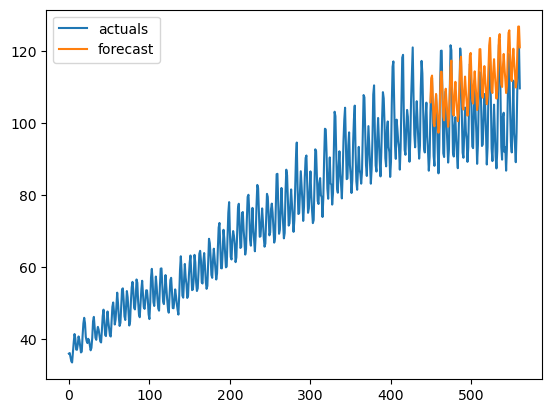

In [144]:
plt.plot(merged_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(merged_df['yhat'],label='forecast')
plt.legend()
plt.show()

# Demand Estimation for next 1-2 years on monthly basis

## We use ExponentialSmoothing model for prediction 

ExponentialSmoothing model giving more accurate predictions compared to other models. 


It has less mean_absolute_percentage_error,rmse,and rmspe

In [149]:
fut=ets_model.predict(start=562 , end= 585)
fut

562     88.813869
563     97.291576
564    101.013258
565     95.071844
566     91.027812
567     86.269216
568     91.561741
569    104.521328
570    112.738308
571    113.320473
572    101.417315
573     91.143590
574     88.813869
575     97.291576
576    101.013258
577     95.071844
578     91.027812
579     86.269216
580     91.561741
581    104.521328
582    112.738308
583    113.320473
584    101.417315
585     91.143590
dtype: float64

In [150]:
fut=pd.Series(fut)
fut_dt_df=pd.date_range(start='2019-10-01',end='2021-10-01',freq='M')
fut_dt_df = pd.DataFrame(fut_dt_df,columns=['date'])

fut_dt_df['date'] = fut_dt_df['date'].apply(lambda x: get_date(x))
fut_dt_df["Electricty_Consumption_in_TW"]=fut.values
fut_dt_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4684\2030008758.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fut_dt_df=pd.date_range(start='2019-10-01',end='2021-10-01',freq='M')


,date,Electricty_Consumption_in_TW
0,2019-10-01,88.813869
1,2019-11-01,97.291576
2,2019-12-01,101.013258
3,2020-01-01,95.071844
4,2020-02-01,91.027812
5,2020-03-01,86.269216
6,2020-04-01,91.561741
7,2020-05-01,104.521328
8,2020-06-01,112.738308
9,2020-07-01,113.320473


In [151]:
temp=final_df[['date','Electricty_Consumption_in_TW']]
temp

,date,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107
...,...,...
556,2019-05-01,97.5860
557,2019-06-01,110.8580
558,2019-07-01,122.1014
559,2019-08-01,121.7765


In [152]:
fi=pd.concat([temp,fut_dt_df],axis=0).reset_index()
fi.drop(["index"],axis=1,inplace=True)
fi["date"]=pd.to_datetime(fi["date"])
fi.head()


,date,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107


In [153]:
fi.tail()

,date,Electricty_Consumption_in_TW
580,2021-05-01,104.521328
581,2021-06-01,112.738308
582,2021-07-01,113.320473
583,2021-08-01,101.417315
584,2021-09-01,91.143590


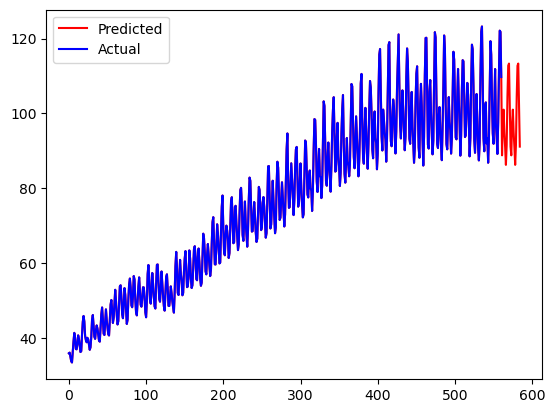

In [154]:
plt.plot(fi['Electricty_Consumption_in_TW'],color='red',label='Predicted')
plt.plot(final_df["Electricty_Consumption_in_TW"],color='blue',label='Actual')
plt.legend()
plt.show()

In [155]:
fi.to_csv('ActualAndPrediction_file.csv',index=False)

In [156]:
fut_dt_df.to_csv('PredictionOnly_file.csv',index=False)